In [48]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

year = 2017
period = ['may-jun', 'jun-jul']

# Import data
if year == 2014:
    X = np.load('../data/processed/data_2014.npz')

elif year == 2015:
    X = np.load('../data/processed/data_2015.npz')

elif year == 2016:
    X = np.load('../data/processed/data_2016.npz')
    
elif year == 2017:
    X = np.load('../data/processed/data_2017.npz')

N = X['N']

dist = X['distance']
#tI1 = X['tI1'].reshape(N,1)
#tI2 = X['tI2'].reshape(N,1)
sI2 = X['sI2'].reshape(N,1)

y_apr = X['y_apr'].reshape(N,1)
y_may = X['y_may'].reshape(N,1)
y_jun = X['y_jun'].reshape(N,1)
y_jul = X['y_jul'].reshape(N,1)

n_apr = X['n_apr'].reshape(N,1)
n_may = X['n_may'].reshape(N,1)
n_jun = X['n_jun'].reshape(N,1)
n_jul = X['n_jul'].reshape(N,1)

a_apr = X['a_apr'].reshape(N,1)
a_may = X['a_may'].reshape(N,1)
a_jun = X['a_jun'].reshape(N,1)
a_jul = X['a_jul'].reshape(N,1)

w_apr = X['wind_apr']
w_may = X['wind_may']
w_jun = X['wind_jun']
w_jul = X['wind_jul']

sI1_apr = X['sI1_apr'].reshape(N,1)
sI1_may = X['sI1_may'].reshape(N,1)
sI1_jun = X['sI1_jun'].reshape(N,1)
sI1_jul = X['sI1_jul'].reshape(N,1)

s_apr = X['s_apr'].reshape(N,1)
s_may = X['s_may'].reshape(N,1)
s_jun = X['s_jun'].reshape(N,1)
s_jul = X['s_jul'].reshape(N,1)

# Convert to float64
dist = dist.astype(np.float64)
#tI1 = tI1.astype(np.float64)
#tI2 = tI2.astype(np.float64)
sI2 = sI2.astype(np.float64)

y_apr = y_apr.astype(np.float64)
y_may = y_may.astype(np.float64)
y_jun = y_jun.astype(np.float64)
y_jul = y_jul.astype(np.float64)

n_apr = n_apr.astype(np.float64)
n_may = n_may.astype(np.float64)
n_jun = n_jun.astype(np.float64)
n_jul = n_jul.astype(np.float64)

a_apr = a_apr.astype(np.float64)
a_may = a_may.astype(np.float64)
a_jun = a_jun.astype(np.float64)
a_jul = a_jul.astype(np.float64)

w_apr = w_apr.astype(np.float64)
w_may = w_may.astype(np.float64)
w_jun = w_jun.astype(np.float64)
w_jul = w_jul.astype(np.float64)

sI1_apr = sI1_apr.astype(np.float64)
sI1_may = sI1_may.astype(np.float64)
sI1_jun = sI1_jun.astype(np.float64)
sI1_jul = sI1_jul.astype(np.float64)

s_apr = s_apr.astype(np.float64)
s_may = s_may.astype(np.float64)
s_jun = s_jun.astype(np.float64)
s_jul = s_jul.astype(np.float64)


# Function to normalize the data
def norm(x):
    
    return (x - np.min(x)) / (np.max(x) - np.min(x))

# Normalize the data
dist = norm(dist)

a_apr = norm(a_apr)
a_may = norm(a_may)
a_jun = norm(a_jun)
a_jul = norm(a_jul)


# Import Paramaters

if year == 2014:
    
    theta_may_jun = np.load('../reports/parameters/theta_may-jun_2014.npy', allow_pickle=True)
    theta_jun_jul = np.load('../reports/parameters/theta_jun-jul_2014.npy', allow_pickle=True)
    
elif year == 2015:
    
    theta_may_jun = np.load('../reports/parameters/theta_may-jun_2015.npy', allow_pickle=True)
    theta_jun_jul = np.load('../reports/parameters/theta_jun-jul_2015.npy', allow_pickle=True)
    
elif year == 2016:
    
    theta_may_jun = np.load('../reports/parameters/theta_may-jun_2016.npy', allow_pickle=True)
    theta_jun_jul = np.load('../reports/parameters/theta_jun-jul_2016.npy', allow_pickle=True)
    
elif year == 2017:
    
    theta_may_jun = np.load('../reports/parameters/theta_may-jun_2017_1_1.npy', allow_pickle=True)
    theta_jun_jul = np.load('../reports/parameters/theta_jun-jul_2017_1_1.npy', allow_pickle=True)

# Safe exponential function
def safe_exp(x):
    """Prevent overflow of exponential function."""
    # np.finfo('d').max is the maximum representable positive number
    # np.log(np.finfo('d').max) is the maximum number that can be exponentiated without overflow
    # We clamp x to this range before taking the exponent
    x = np.clip(x, None, np.log(np.finfo('d').max))
    return np.exp(x)

# Define the function eta() which takes input parameters theta and returns the log-odds of disease for each yard i in current time period
def eta(theta, period, y_lag):
    
    y_lag = y_lag
    
    if period == 'may-jun':

        #y_lag = y_may
        n_lag = n_may
        a_lag = a_may
        w_lag = w_may
        sI1_lag = sI1_may
        s_lag = s_may

    elif period == 'jun-jul':
        
        #y_lag = y_jun
        n_lag = n_jun
        a_lag = a_jun
        w_lag = w_jun
        sI1_lag = sI1_jun
        s_lag = s_jun
    
    eta = []
        
    beta1, beta2, delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22 = theta
    
    for i in range(0, N):
    
        auto_infection1 = beta1 + delta1 * (y_lag[i] / n_lag[i]) * np.exp(-eta11 * s_lag[i])
        auto_infection2 = beta2 + delta2 * (y_lag[i] / n_lag[i]) * np.exp(-eta12 * s_lag[i])

        mask = np.arange(N) != i # mask out the current yard i
        
        dispersal_component1 = gamma1 * np.sum(((a_lag[mask] * (y_lag[mask] / n_lag[mask])) * np.exp(-eta21 * s_lag[mask]) * (w_lag[:, i][mask].reshape(N-1, 1) * np.exp(-alpha1 * dist[:, i][mask].reshape(N-1, 1))) * sI1_lag[mask]))
        dispersal_component2 = gamma2 * np.sum(((a_lag[mask] * (y_lag[mask] / n_lag[mask])) * np.exp(-eta22 * s_lag[mask]) * (w_lag[:, i][mask].reshape(N-1, 1) * np.exp(-alpha2 * dist[:, i][mask].reshape(N-1, 1))) * sI2[mask]))
    
        eta_i = tI1[i] * (auto_infection1 + dispersal_component1) + tI2[i] * (auto_infection2 + dispersal_component2)
        eta.append(eta_i)
    
    eta = np.array(eta).reshape(N,1)
    
    return eta



# Probability Function

def prob(theta, period, y_lag):
    
    p = 1 / (1 + np.exp(-eta(theta, period, y_lag)))
    
    for i in range(0, N):
    
        if y_lag[i, 0] == 0.0:
            
            p[i, 0] = 0.0    
    
    return p

def prob1(theta, period, y_lag):
    
    p = 1 / (1 + np.exp(-eta(theta, period, y_lag))) 
    
    return p

def prob(theta, period, y_lag):
    
    p = 1 / (1 + np.exp(-eta(theta, period, y_lag)))
    
    for i in range(0, N):
    
        if np.sum(y_lag) == 0.0:
            
            p[i, 0] = 0.0    
    
    return p


# USE LOG SUM EXP TRICK FOR NUMERICAL STABILITY
#def prob(theta, period, y_lag):
    # Calculate the log-odds
#    log_odds = eta(theta, period, y_lag)
    
    # Apply the log-sum-exp trick
#    max_log_odds = np.max(log_odds)
#    log_prob = log_odds - max_log_odds
#    exp_log_prob = np.exp(log_prob)
#    log_sum_exp = np.sum(exp_log_prob)
#    log_prob_normalized = log_prob - np.log(log_sum_exp)
    
    # Convert back to probabilities
#    prob = np.exp(log_prob_normalized)
    
    
    
#    return prob


# Read data from CSV file into a pandas DataFrame
df = pd.read_csv('../data/processed/cost_data.csv', encoding='utf-8')

# Use the dataframe to create a scatter_geo plot
#fig = px.scatter_geo(df, lat='Centroid Lat', lon='Centroid Long',
#                     projection="natural earth")

fig = px.scatter_mapbox(df[df['Year'] == year], lat='Centroid Lat', lon='Centroid Long', hover_name="Field ID", hover_data=["Grower"],
                        color_discrete_sequence=["blue"], zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

print('Number of Fields: ', N)
#fig.show()

Number of Fields:  130


In [43]:
theta_test = np.array([[    0],
       [    0],
       [-2026.35615832],
       [   34.42700692],
       [-6426.03181707],
       [-9151.57587311],
       [   -4.6077295 ],
       [   -4.940867  ],
       [ 2184.36919864],
       [   -1.11189887],
       [   -0.4499415 ],
       [    0.17128957]])

In [45]:
theta_may_jun

array([[    2.76562828],
       [    0.38540121],
       [-2026.35615832],
       [   34.42700692],
       [-6426.03181707],
       [-9151.57587311],
       [   -4.6077295 ],
       [   -4.940867  ],
       [ 2184.36919864],
       [   -1.11189887],
       [   -0.4499415 ],
       [    0.17128957]])

In [47]:
prob2(theta=theta_test, period='may-jun', y_lag=y_0_array[0])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [3]:
theta_may_jun

array([[    2.76562828],
       [    0.38540121],
       [-2026.35615832],
       [   34.42700692],
       [-6426.03181707],
       [-9151.57587311],
       [   -4.6077295 ],
       [   -4.940867  ],
       [ 2184.36919864],
       [   -1.11189887],
       [   -0.4499415 ],
       [    0.17128957]])

In [4]:
theta_jun_jul

array([[ -3.27984287],
       [ -1.88645822],
       [ 13.99890895],
       [ 14.97972467],
       [-10.87910002],
       [-39.35831275],
       [ -2.06276433],
       [  2.61942527],
       [ -0.64336604],
       [  0.20618654],
       [ -0.68528102],
       [ -1.46375126]])

# Simulations

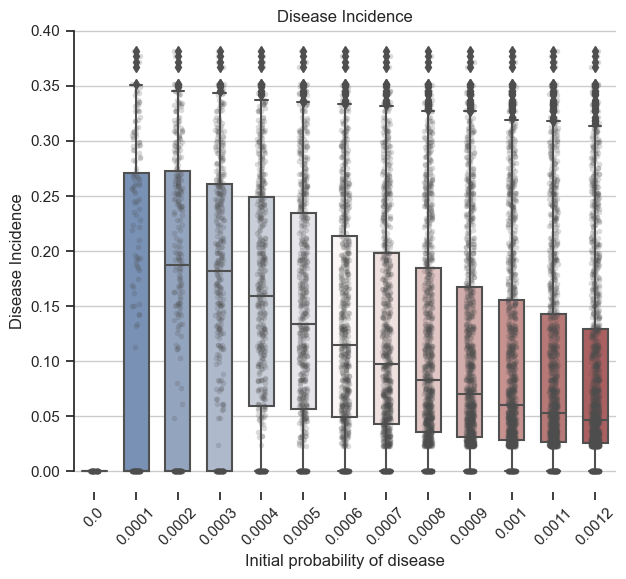

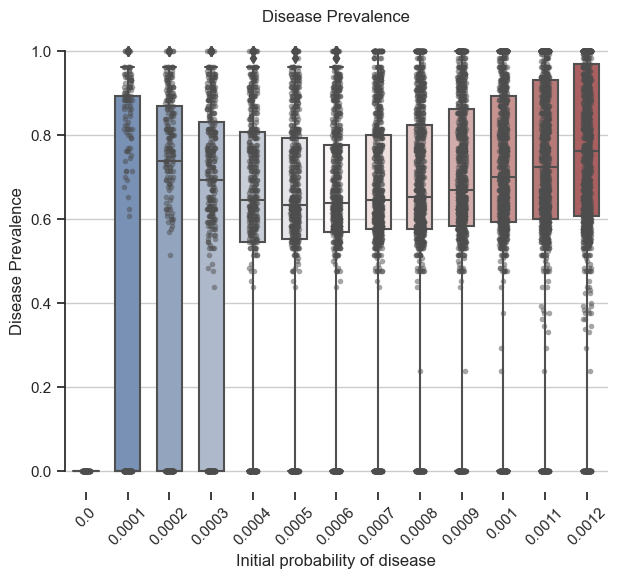

In [49]:
# Create synthetic landscape containing varieties

# Create a numpy array of shape (N, 3) with randomly assigned values [0, 1, variety] and [1, 0, variety]
arr = np.zeros((N, 3))

if N % 2 == 0:
    arr[:int(N/2), 0] = 1
    arr[int(N/2):, 1] = 1
    arr[:int(N/4), 2] = 0  # chinook
    arr[int(N/4):int(N/2), 2] = 1  # simcoe
    arr[int(N/2):int(3*N/4), 2] = 2  # mosaic
    arr[int(3*N/4):, 2] = 3  # nugget
else:
    arr[:int((N+1)/2), 0] = 1
    arr[int((N-1)/2):, 1] = 1
    arr[:int((N+1)/4), 2] = 0  # chinook
    arr[int((N+1)/4):int((N+1)/2), 2] = 1  # simcoe
    arr[int((N-1)/2):int((3*N-1)/4), 2] = 2  # mosaic
    arr[int((3*N-1)/4):, 2] = 3  # nugget

# Shuffle the array
np.random.shuffle(arr)

# Split the columns into three (N, 1) arrays
tI1 = arr[:, 0].reshape(N, 1)
tI2 = arr[:, 1].reshape(N, 1)
tI3 = arr[:, 2].reshape(N, 1)

# Create a dictionary for plant varieties
variety_dict = {0: 'chinook', 1: 'simcoe', 2: 'mosaic', 3: 'nugget'}

# Replace plant variety numbers with their names
variety_array = np.vectorize(variety_dict.get)(tI3)

# Create a pandas DataFrame
variety_df = pd.DataFrame(np.hstack([tI1, tI2, tI3]), columns=['Susceptibility1', 'Susceptibility2', 'Variety'])


# Probability of initial flagshoots
p_values = [0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012]
n_may = n_may.astype(int)
simulations = 100

y_0_list = []
y_1_list = []
y_2_list = []

disease_prevalence_list = []
disease_incidence_list = []

for p_may in p_values:

    for i in range(simulations):

        # Create synthetic initial flagshoot array

        y_0 = np.random.binomial(n_may, p_may, size=(N, 1))
        y_0_list.append(y_0)
        
        y_1 = np.round(prob(theta_may_jun, period='may-jun', y_lag=y_0) * n_jun)
        y_1_list.append(y_1)
        
        y_2 = np.round(prob(theta_jun_jul, period='jun-jul', y_lag=y_1) * n_jul)
        y_2_list.append(y_2)
        
    y_0_array = np.array(y_0_list)
    y_1_array = np.array(y_1_list)
    y_2_array = np.array(y_2_list)
    
    
    # Calculate disease prevalence and incidence
    disease_prevalence = np.count_nonzero(y_0_array + y_1_array + y_2_array, axis=1) / N
    disease_incidence = (np.mean((y_0_array / n_may), axis=1) + np.mean((y_1_array / n_jun), axis=1) + np.mean((y_2_array / n_jul), axis=1)) / 3
    
    
    disease_prevalence_list.append(disease_prevalence)
    disease_incidence_list.append(disease_incidence)
    


# Flatten the disease_incidence_list
flat_disease_incidence_list = [item for sublist in disease_incidence_list for item in sublist.ravel()]

# Repeat each p_value based on the number of simulations run for it
p_values_repeated = []
for i in range(len(p_values)):
    p_values_repeated.extend([p_values[i]] * len(disease_incidence_list[i]))

# Check if lengths are the same
assert len(flat_disease_incidence_list) == len(p_values_repeated), \
    f"Lengths do not match: {len(flat_disease_incidence_list)} vs {len(p_values_repeated)}"

# Convert list of arrays into DataFrame
df = pd.DataFrame({
    'p_value': p_values_repeated, 
    'disease_incidence': flat_disease_incidence_list
})

sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(7, 6))

# Plot the disease incidence with vertical boxes
sns.boxplot(x='p_value', y='disease_incidence', data=df, whis=[2.5, 97.5], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x='p_value', y='disease_incidence', data=df, size=4, color=".3", linewidth=0, alpha=0.2)

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(xlabel="Initial probability of disease", ylabel="Disease Incidence")
ax.set_title("Disease Incidence")
sns.despine(trim=True, bottom=True)
plt.xticks(rotation=45)
plt.show()


# Flatten the disease_prevalence_list
flat_disease_prevalence_list = [item for sublist in disease_prevalence_list for item in sublist.ravel()]

# Repeat each p_value based on the number of simulations run for it
p_values_repeated = []
for i in range(len(p_values)):
    p_values_repeated.extend([p_values[i]] * len(disease_prevalence_list[i]))

# Check if lengths are the same
assert len(flat_disease_prevalence_list) == len(p_values_repeated), \
    f"Lengths do not match: {len(flat_disease_prevalence_list)} vs {len(p_values_repeated)}"

# Convert list of arrays into DataFrame
df_prevalence = pd.DataFrame({
    'p_value': p_values_repeated, 
    'disease_prevalence': flat_disease_prevalence_list
})

sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(7, 6))

# Plot the disease prevalence with vertical boxes
sns.boxplot(x='p_value', y='disease_prevalence', data=df_prevalence, whis=[2.5, 97.5], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x='p_value', y='disease_prevalence', data=df_prevalence, size=4, color=".3", linewidth=0, alpha=0.5)

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(xlabel="Initial probability of disease", ylabel="Disease Prevalence")
sns.despine(trim=True, bottom=True)
ax.set_title("Disease Prevalence")
plt.xticks(rotation=45)
plt.show()


# Disease prevalence and incidence for each period

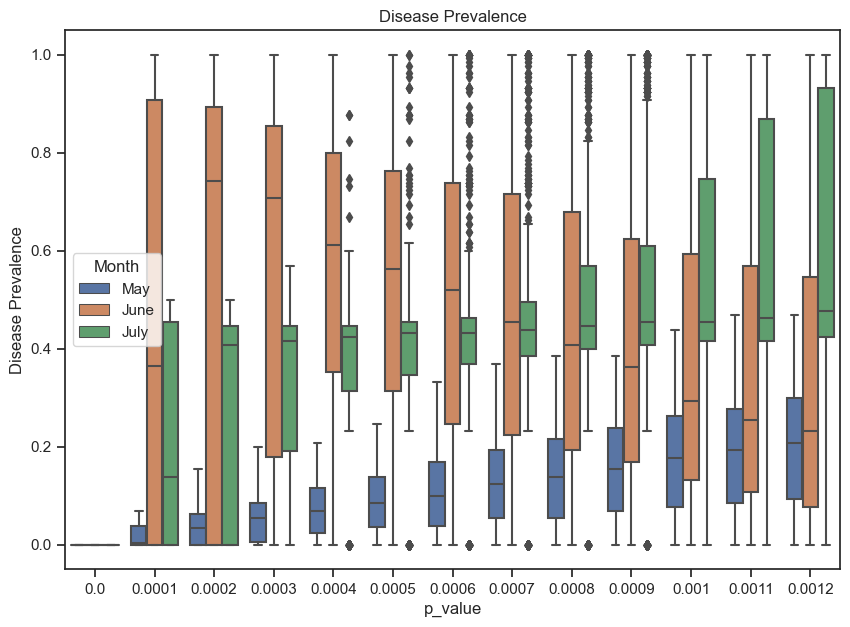

In [50]:
# Create synthetic landscape containing varieties

# Create a numpy array of shape (N, 3) with randomly assigned values [0, 1, variety] and [1, 0, variety]
arr = np.zeros((N, 3))

if N % 2 == 0:
    arr[:int(N/2), 0] = 1
    arr[int(N/2):, 1] = 1
    arr[:int(N/4), 2] = 0  # chinook
    arr[int(N/4):int(N/2), 2] = 1  # simcoe
    arr[int(N/2):int(3*N/4), 2] = 2  # mosaic
    arr[int(3*N/4):, 2] = 3  # nugget
else:
    arr[:int((N+1)/2), 0] = 1
    arr[int((N-1)/2):, 1] = 1
    arr[:int((N+1)/4), 2] = 0  # chinook
    arr[int((N+1)/4):int((N+1)/2), 2] = 1  # simcoe
    arr[int((N-1)/2):int((3*N-1)/4), 2] = 2  # mosaic
    arr[int((3*N-1)/4):, 2] = 3  # nugget

# Shuffle the array
np.random.shuffle(arr)

# Split the columns into three (N, 1) arrays
tI1 = arr[:, 0].reshape(N, 1)
tI2 = arr[:, 1].reshape(N, 1)
tI3 = arr[:, 2].reshape(N, 1)

# Create a dictionary for plant varieties
variety_dict = {0: 'chinook', 1: 'simcoe', 2: 'mosaic', 3: 'nugget'}

# Replace plant variety numbers with their names
variety_array = np.vectorize(variety_dict.get)(tI3)

# Create a pandas DataFrame
variety_df = pd.DataFrame(np.hstack([tI1, tI2, tI3]), columns=['Susceptibility1', 'Susceptibility2', 'Variety'])


# Probability of initial flagshoots
p_values = [0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012]
n_may = n_may.astype(int)
simulations = 100

y_0_list = []
y_1_list = []
y_2_list = []

disease_prevalence_list_0 = []
disease_prevalence_list_1 = []
disease_prevalence_list_2 = []

disease_incidence_list_0 = []
disease_incidence_list_1 = []
disease_incidence_list_2 = []

for p_may in p_values:

    for i in range(simulations):

        # Create synthetic initial flagshoot array

        y_0 = np.random.binomial(n_may, p_may, size=(N, 1))
        y_0_list.append(y_0)
        
        y_1 = np.round(prob(theta_may_jun, period='may-jun', y_lag=y_0) * n_jun)
        y_1_list.append(y_1)
        
        y_2 = np.round(prob(theta_jun_jul, period='jun-jul', y_lag=y_1) * n_jul)
        y_2_list.append(y_2)
        
    y_0_array = np.array(y_0_list)
    y_1_array = np.array(y_1_list)
    y_2_array = np.array(y_2_list)
    
    
    # Calculate disease prevalence and incidence
    disease_prevalence_0 = np.count_nonzero(y_0_array, axis=1) / N
    disease_prevalence_1 = np.count_nonzero(y_1_array, axis=1) / N
    disease_prevalence_2 = np.count_nonzero(y_2_array, axis=1) / N
    
    disease_incidence_0 = np.mean((y_0_array / n_may), axis=1)
    disease_incidence_1 = np.mean((y_1_array / n_jun), axis=1)
    disease_incidence_2 = np.mean((y_2_array / n_jul), axis=1)
    

    disease_prevalence_list_0.append(disease_prevalence_0)
    disease_prevalence_list_1.append(disease_prevalence_1)
    disease_prevalence_list_2.append(disease_prevalence_2)

    
    disease_incidence_list_0.append(disease_incidence_0)
    disease_incidence_list_1.append(disease_incidence_1)
    disease_incidence_list_2.append(disease_incidence_2)
    


all_data = []
for i, p_may in enumerate(p_values):
    for prevalence_0 in disease_prevalence_list_0[i].flatten():
        all_data.append([p_may, prevalence_0, 'May'])
    for prevalence_1 in disease_prevalence_list_1[i].flatten():
        all_data.append([p_may, prevalence_1, 'June'])
    for prevalence_2 in disease_prevalence_list_2[i].flatten():
        all_data.append([p_may, prevalence_2, 'July'])

# Create a DataFrame
df = pd.DataFrame(all_data, columns=['p_value', 'Disease Prevalence', 'Month'])


# Plotting
plt.figure(figsize=(10, 7))
sns.boxplot(x='p_value', y='Disease Prevalence', hue='Month', data=df)
plt.title('Disease Prevalence')
plt.show()



## Summary statistics

### Disease incidence

In [193]:
p_value = 0

n_decimal = 6

print('Initial probability of disease: ', p_values[p_value])

# Print Median disease prevalence

print('Median disease incidence: ', np.round(np.median(disease_incidence_list[p_value]), n_decimal))

# Print min and max of disease prevalence

print('Min disease incidence: ', np.round(np.min(disease_incidence_list[p_value]), n_decimal))
print('Max disease incidence: ', np.round(np.max(disease_incidence_list[p_value]), n_decimal))

# Print 2.5 and 97.5 percentile of disease prevalence
print('2.5 percentile disease incidence: ', np.round(np.percentile(disease_incidence_list[p_value], 2.5), n_decimal))
print('97.5 percentile disease incidence: ', np.round(np.percentile(disease_incidence_list[p_value], 97.5), n_decimal))

Initial probability of disease:  0
Median disease incidence:  0.005808
Min disease incidence:  0.005808
Max disease incidence:  0.005808
2.5 percentile disease incidence:  0.005808
97.5 percentile disease incidence:  0.005808


### Disease prevalence

In [196]:
p_value = 0

print('Initial probability of disease: ', p_values[p_value])

# Print Median disease prevalence

print('Median disease prevalence: ', np.round(np.median(disease_prevalence_list[p_value]), 4))

# Print min and max of disease prevalence

print('Min disease prevalence: ', np.round(np.min(disease_prevalence_list[p_value]), 4))
print('Max disease prevalence: ', np.round(np.max(disease_prevalence_list[p_value]), 4))

# Print 2.5 and 97.5 percentile of disease prevalence
print('2.5 percentile disease prevalence: ', np.round(np.percentile(disease_prevalence_list[p_value], 2.5), 4))
print('97.5 percentile disease prevalence: ', np.round(np.percentile(disease_prevalence_list[p_value], 97.5), 4))

Initial probability of disease:  0
Median disease prevalence:  1.0
Min disease prevalence:  1.0
Max disease prevalence:  1.0
2.5 percentile disease prevalence:  1.0
97.5 percentile disease prevalence:  1.0


In [146]:
field_list = []
lat_list = []
long_list = []
mildew_incidence_list = []
grower_list = []
period_list = []

field_id = df.loc[df['Year'] == year, 'Field ID'].unique()

periods = [0, 1, 2]

for period in periods:
    
    for i in range(len(field_id)):
        
        field_list.append(field_id[i])
        lat_list.append(df.loc[df['Field ID'] == field_id[i], 'Centroid Lat'].iloc[0])
        long_list.append(df.loc[df['Field ID'] == field_id[i], 'Centroid Long'].iloc[0])
        grower_list.append(df.loc[df['Field ID'] == field_id[i], 'Grower'].iloc[0])
        period_list.append(period)
        
        if period == 0:
            mildew_incidence_list.append(((np.mean(y_0_array, axis=1))[0] / n_may[i])[0])
            
        if period == 1:
            mildew_incidence_list.append(((np.mean(y_1_array, axis=1))[0] / n_jun[i])[0])
            
        if period == 2:
            mildew_incidence_list.append(((np.mean(y_2_array, axis=1))[0] / n_jul[i])[0])
            
synthetic_data = {
    "Field ID" : field_list,
    "Period" : period_list,
    "Centroid Lat" : lat_list,
    "Centroid Long" : long_list,
    "Grower" : grower_list,
    "Mildew Incidence" : mildew_incidence_list,
}

synthetic_data = pd.DataFrame(synthetic_data)

In [147]:
import plotly.express as px
synthetic_data['log_mildew_incidence'] = np.log(synthetic_data['Mildew Incidence'] + 0.0000001)
# calculate log odds from probability
synthetic_data['log_odds'] = np.log(synthetic_data['Mildew Incidence'] / (1 - synthetic_data['Mildew Incidence']) + 1e-10)

fig = px.density_mapbox(synthetic_data, lat='Centroid Lat', lon='Centroid Long', z='log_mildew_incidence',
                        hover_name="Field ID", hover_data=["Grower", "Mildew Incidence"],
                        radius=10, zoom=10, height=600,
                        mapbox_style="stamen-terrain",
                        animation_frame="Period", # Add animation_frame parameter
                        color_continuous_scale="thermal", # Add color_continuous_scale parameter, "turbo" is also a good option
                        range_color=[np.min(synthetic_data['log_mildew_incidence']), np.max(synthetic_data['log_mildew_incidence'])]) # Add range_color parameter

#fig.update_geos(fitbounds="locations")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

print('Number of Fields: ', N)

fig.show()

Number of Fields:  130


# Revenue change

In [38]:
# Data for the estimation of cone incidence vs leaf incidence
df_cone_incidence_leaf_incidence = pd.read_csv('../data/raw/economics/Leaf incidence_vs_Cone_incidence.csv', encoding='utf-8')

# Data preprocessing
df_cone_incidence_leaf_incidence = df_cone_incidence_leaf_incidence.dropna()

# Data for the estimation of yield loss vs cone incidence (change in quantity metric)
df_yield_loss_cone_incidence = pd.read_csv('../data/raw/economics/Cone incidence_vs_Cone color_and_Yield.csv', encoding='utf-8')
df_yield_loss_cone_incidence = df_yield_loss_cone_incidence[['Cone incidence', 'Yield Loss']]

# Data for the estimation of cone color vs cone incidence (change in quality metric)
df_cone_color_cone_incidence = pd.read_csv('../data/raw/economics/Cone incidence_vs_Cone color_and_Yield.csv', encoding='utf-8')
df_cone_color_cone_incidence = df_cone_color_cone_incidence[['Cone incidence', 'Cone Color']]


# Data
data_cone_incidence_leaf_incidence = df_cone_incidence_leaf_incidence.to_numpy()
data_yield_loss_cone_incidence = df_yield_loss_cone_incidence.to_numpy()
data_cone_color_cone_incidence = df_cone_color_cone_incidence.to_numpy()

# Linear regressions
a1, b1 = np.polyfit(data_cone_incidence_leaf_incidence[:, 0], data_cone_incidence_leaf_incidence[:, 1], 1)
a2, b2 = np.polyfit(data_yield_loss_cone_incidence[:, 0], data_yield_loss_cone_incidence[:, 1], 1)

# adjust y-values to make intercept 0
adjusted_y = data_cone_color_cone_incidence[:, 1] - 10

# fit a line with intercept of 0
a3, b3 = np.polyfit(data_cone_color_cone_incidence[:, 0], adjusted_y, 1)



# Load parameters
checkpoint1 = np.load('../reports/checkpoint_high_demand.npy', allow_pickle=True)
theta_high = checkpoint1[0]

checkpoint2 = np.load('../reports/checkpoint_moderate_demand.npy', allow_pickle=True)
theta_moderate = checkpoint2[0]

checkpoint3 = np.load('../reports/checkpoint_low_demand.npy', allow_pickle=True)
theta_low = checkpoint3[0]

# Define logistic sigmoid function
def sigmoid(z):

    g = 1 / (1 + np.exp(-z))
    
    return g

# QUALITY METRIC
# Function to estimate cone color given plant incidence
def cone_color(plant_incidence, n=10, D=1.19):
    
    # n is the number of leaves sampled and D is the index of dispersion
    n_D = n / D 
    
    leaf_incidence = leaf_incidence = 1 - (1 - plant_incidence) ** (1 / n_D)
    
    cone_incidence = a1 * leaf_incidence + b1
    # intercept fixed at 10 since that's the highest cone color rating
    cone_color = a3 * cone_incidence + 10
    
    return cone_color

# QUANTITY METRIC
# Function to estimate yield loss given plant incidence (probability of disease in plants)
def yield_loss(plant_incidence, n=10, D=1.19):
    
    # n is the number of leaves sampled and D is the index of dispersion
    n_D = n / D 
    
    leaf_incidence = 1 - (1 - plant_incidence) ** (1 / n_D)
    
    cone_incidence = a1 * leaf_incidence + b1
    
    yield_loss = a2 * cone_incidence
    
    return yield_loss


# Function to estimate revenue and revenue change given plant incidence
def revenue(plant_incidence, n=10, D=1.19, demand="high", variety="nugget"):
    
    if variety == "nugget":
        initial_yield = 2038.0
        initial_price = [2.5, 4.25, 6.0] #[low, mod, high] demand
        
    elif variety == "chinook":
        initial_yield = 1629.3333
        initial_price = [4.0, 5.0, 6.5]
        
    elif variety == "simcoe":
        initial_yield = 1752.0
        initial_price = [5.0, 6.5, 8.0]
        
    elif variety == "mosaic":
        initial_yield = 2134.0
        initial_price = [5.0, 6.5, 8.0]
        
    
    adjusted_yield = initial_yield * (1 - yield_loss(plant_incidence, n, D))
    
    if demand == "low":
        
        adjusted_price = initial_price[0] * sigmoid(theta_low[0] + theta_low[1] * cone_color(plant_incidence, n, D))
        adjusted_yield = initial_yield * (1 - yield_loss(plant_incidence, n, D))
        revenue = initial_price[0] * initial_yield
        adjusted_revenue = adjusted_price * adjusted_yield
        revenue_change = (adjusted_revenue - revenue) / revenue
    
    elif demand == "moderate":
        
        adjusted_price = initial_price[1] * sigmoid(theta_moderate[0] + theta_moderate[1] * cone_color(plant_incidence, n, D))
        revenue = initial_price[1] * initial_yield
        adjusted_revenue = adjusted_price * adjusted_yield
        revenue_change = (adjusted_revenue - revenue) / revenue
        
    elif demand == "high":
        
        adjusted_price = initial_price[2] * sigmoid(theta_high[0] + theta_high[1] * cone_color(plant_incidence, n, D))
        revenue = initial_price[2] * initial_yield
        adjusted_revenue = adjusted_price * adjusted_yield
        revenue_change = (adjusted_revenue - revenue) / revenue
        
    return adjusted_revenue, revenue_change

In [53]:
revenue_change_simulations_list = []

for simulation in range(0, simulations):

    revenue_change_list = []

    for field in range(0, N):
        
        revenue_change = revenue((y_2_array[simulation][field] / n_jul[field]), n=10, D=1.19, demand="high", variety=variety_array[field][0])[1]
        revenue_change_list.append(revenue_change)
        
    revenue_change_array = np.array(revenue_change_list).reshape(N, 1)
    revenue_change_simulations_list.append(revenue_change_array)

In [61]:
y_2_array.shape

(400, 130, 1)

In [59]:
np.sum(revenue_change_simulations_list, axis=0) / simulations

array([[-0.00551479],
       [-0.00904547],
       [-0.0087228 ],
       [-0.00551479],
       [-0.00551479],
       [-0.00904547],
       [-0.00551479],
       [-0.00551479],
       [-0.00904547],
       [-0.00888373],
       [-0.0087228 ],
       [-0.00551479],
       [-0.00888373],
       [-0.00551479],
       [-0.00888373],
       [-0.00551479],
       [-0.0084033 ],
       [-0.0084033 ],
       [-0.00551479],
       [-0.00551479],
       [-0.00904547],
       [-0.00551479],
       [-0.0084033 ],
       [-0.0084033 ],
       [-0.0084033 ],
       [-0.0084033 ],
       [-0.00551479],
       [-0.00551479],
       [-0.00551479],
       [-0.0087228 ],
       [-0.00551479],
       [-0.00551479],
       [-0.0084033 ],
       [-0.0087228 ],
       [-0.0087228 ],
       [-0.0087228 ],
       [-0.00551479],
       [-0.0087228 ],
       [-0.00888373],
       [-0.00551479],
       [-0.00551479],
       [-0.00551479],
       [-0.00888373],
       [-0.0053696 ],
       [-0.0053696 ],
       [-0

In [64]:
# Initialize an empty dictionary to hold revenue change arrays for each scenario
revenue_change_simulation_lists = {"low": [], "moderate": [], "high": []}

# Calculate revenue change for each scenario and append the array to the corresponding list
for scenario in ["low", "moderate", "high"]:
    for simulation in range(simulations):
        revenue_change_list = []
        for field in range(N):
            revenue_change = revenue((y_2_array[simulation][field] / n_jul[field]), n=10, D=1.19, demand=scenario, variety=variety_array[field][0])[1]
            revenue_change_list.append(revenue_change)
        revenue_change_array = np.array(revenue_change_list).reshape(N, 1)
        # Flatten the array before appending
        revenue_change_simulation_lists[scenario].append(revenue_change_array.ravel())

# Repeat each p_value based on the number of simulations run for it and plot the box plot for each scenario
for scenario in ["low", "moderate", "high"]:
    p_values_repeated = []
    flat_revenue_change_list = [item for sublist in revenue_change_simulation_lists[scenario] for item in sublist]
    for i in range(len(p_values)):
        p_values_repeated.extend([p_values[i]] * simulations)
    
    print(f"Length of p_values_repeated for {scenario} demand: {len(p_values_repeated)}")
    print(f"Length of flat_revenue_change_list for {scenario} demand: {len(flat_revenue_change_list)}")
    
    if len(p_values_repeated) != len(flat_revenue_change_list):
        print(f"Warning: Lengths do not match for {scenario} demand!")
        continue

    df_revenue_change = pd.DataFrame({
        'p_value': p_values_repeated, 
        'revenue_change': flat_revenue_change_list
    })
    sns.set_theme(style="ticks")

    # Initialize the figure
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot the revenue change with vertical boxes
    sns.boxplot(x='p_value', y='revenue_change', data=df_revenue_change, whis=[2.5, 97.5], width=.6, palette="vlag")

    # Add in points to show each observation
    sns.stripplot(x='p_value', y='revenue_change', data=df_revenue_change, size=4, color=".3", linewidth=0, alpha=0.2)

    # Tweak the visual presentation
    ax.yaxis.grid(True)
    ax.set(xlabel="Initial probability of disease", ylabel="Revenue Change")
    ax.set_title(f"Revenue Change for {scenario} demand")
    sns.despine(trim=True, bottom=True)
    
    plt.show()


Length of p_values_repeated for low demand: 400
Length of flat_revenue_change_list for low demand: 13000
Length of p_values_repeated for moderate demand: 400
Length of flat_revenue_change_list for moderate demand: 13000
Length of p_values_repeated for high demand: 400
Length of flat_revenue_change_list for high demand: 13000
